## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## 1. Data Import

In [2]:
url = "./Players_2020.csv"
df = pd.read_csv(url)
df.tail(15)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
662,516,Robert Williams,F,22,BOS,29,1,13.4,2.2,3,...,0.647,1.4,3,4.4,0.9,0.8,1.2,0.7,1.8,5.2
663,517,Nigel Williams-Goss,B,25,UTA,10,0,5,0.5,1.6,...,1,0.2,0.4,0.6,0.6,0.3,0.1,0.3,0.6,1.4
664,518,Zion Williamson,F,19,NOP,24,24,27.8,8.8,15,...,0.64,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
665,519,D.J. Wilson,F,23,MIL,37,1,9.8,1.4,3.6,...,0.611,0.3,2.2,2.5,0.7,0.1,0.1,0.5,0.9,3.6
666,520,Justise Winslow,B,23,MIA,11,5,32,4.5,11.7,...,0.667,1.5,5.2,6.6,4,0.6,0.5,2.2,3.5,11.3
667,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
668,521,Christian Wood,F,24,DET,62,12,21.4,4.6,8.2,...,0.744,1.7,4.6,6.3,1,0.5,0.9,1.4,1.6,13.1
669,522,Delon Wright,B,27,DAL,73,5,21.5,2.6,5.6,...,0.77,1,2.9,3.8,3.3,1.2,0.3,1,1.3,6.9
670,523,Justin Wright-Foreman,B,22,UTA,4,0,11.3,1.8,5,...,0.75,0,1.3,1.3,1.8,0.5,0,0.8,1.3,4.8
671,524,Thaddeus Young,F,31,CHI,64,16,24.9,4.2,9.4,...,0.583,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3


## 2. Explore and clean data. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      677 non-null    object
 1   Player  677 non-null    object
 2   Pos     677 non-null    object
 3   Age     677 non-null    object
 4   Tm      677 non-null    object
 5   G       677 non-null    object
 6   GS      677 non-null    object
 7   MP      677 non-null    object
 8   FG      677 non-null    object
 9   FGA     677 non-null    object
 10  FG%     675 non-null    object
 11  3P      677 non-null    object
 12  3PA     677 non-null    object
 13  3P%     642 non-null    object
 14  2P      677 non-null    object
 15  2PA     677 non-null    object
 16  2P%     671 non-null    object
 17  eFG%    675 non-null    object
 18  FT      677 non-null    object
 19  FTA     677 non-null    object
 20  FT%     644 non-null    object
 21  ORB     677 non-null    object
 22  DRB     677 non-null    ob

In [4]:
# Rows that contain 'Player' in df['Player'] are not player entries
df.drop(df[df['Player'] == 'Player'].index, inplace=True)

In [5]:
print("The DataFrame consists of {} rows and {} features".format(df.shape[0],df.shape[1]))

The DataFrame consists of 651 rows and 30 features


In [6]:
pos_map = {'B':0,'F':1}
df['Pos'] = df['Pos'].map(pos_map)
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
672,525,Trae Young,0,21,ATL,60,60,35.3,9.1,20.8,...,0.86,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,526,Cody Zeller,1,27,CHO,58,39,23.1,4.3,8.3,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,527,Tyler Zeller,1,30,SAS,2,0,2,0.5,2,...,NaN,1.5,0.5,2,0,0,0,0,0,1
675,528,Ante Å½iÅ¾iÄ,1,23,CLE,22,0,10,1.9,3.3,...,0.737,0.8,2.2,3,0.3,0.3,0.2,0.5,1.2,4.4
676,529,Ivica Zubac,1,22,LAC,72,70,18.4,3.3,5.3,...,0.747,2.7,4.8,7.5,1.1,0.2,0.9,0.8,2.3,8.3


In [7]:
df.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       33
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [8]:
nonNumeric = ['Player','Tm']
for col in df:
    if col not in nonNumeric:
        df[col] = pd.to_numeric(df[col])

In [9]:
print("The DataFrame consists of {} rows and {} features".format(df.shape[0],df.shape[1]))

The DataFrame consists of 651 rows and 30 features


In [10]:
df.dtypes

Rk          int64
Player     object
Pos         int64
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [11]:
df.drop(df[df['G'] < 30].index, inplace = True)

In [12]:
df.drop_duplicates(subset=['Player'],keep='first')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,1,26,OKC,63,63,26.7,4.5,7.6,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,1,22,MIA,72,72,33.6,6.1,11.0,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,1,34,SAS,53,53,33.1,7.4,15.0,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
4,5,Nickeil Alexander-Walker,0,21,NOP,47,1,12.6,2.1,5.7,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
5,6,Grayson Allen,0,24,MEM,38,0,18.9,3.1,6.6,...,0.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,522,Delon Wright,0,27,DAL,73,5,21.5,2.6,5.6,...,0.770,1.0,2.9,3.8,3.3,1.2,0.3,1.0,1.3,6.9
671,524,Thaddeus Young,1,31,CHI,64,16,24.9,4.2,9.4,...,0.583,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3
672,525,Trae Young,0,21,ATL,60,60,35.3,9.1,20.8,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,526,Cody Zeller,1,27,CHO,58,39,23.1,4.3,8.3,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1


In [13]:
columns_to_drop = ['Rk','Player','Tm'] 
df.drop(columns = columns_to_drop,inplace = True)

In [14]:
df.isnull().sum()

Pos     0
Age     0
G       0
GS      0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     9
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64

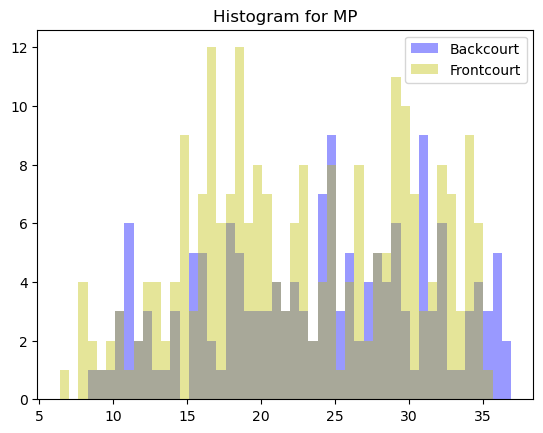

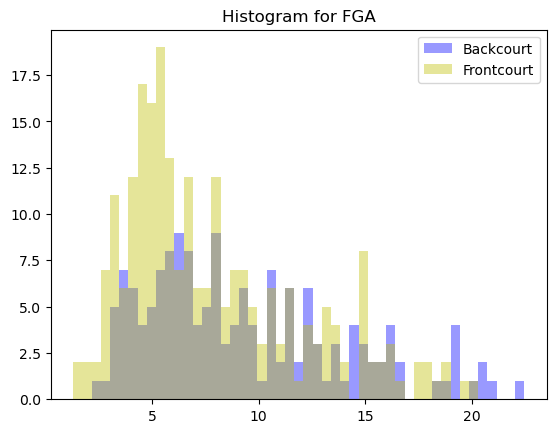

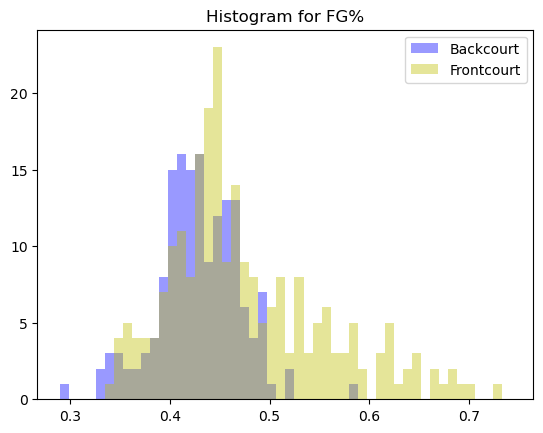

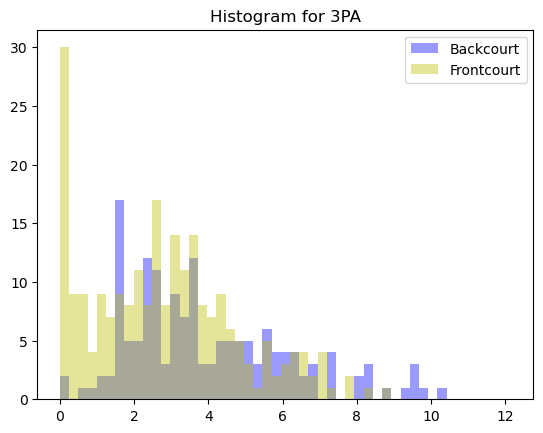

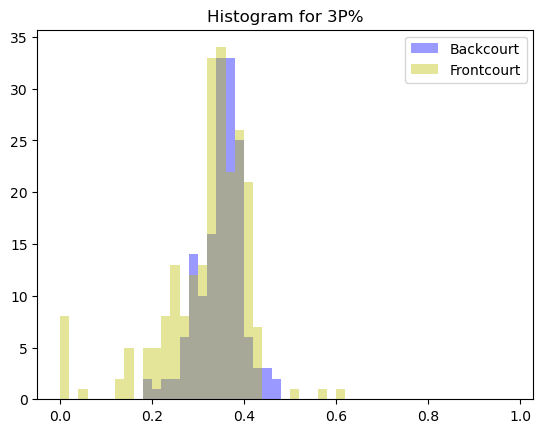

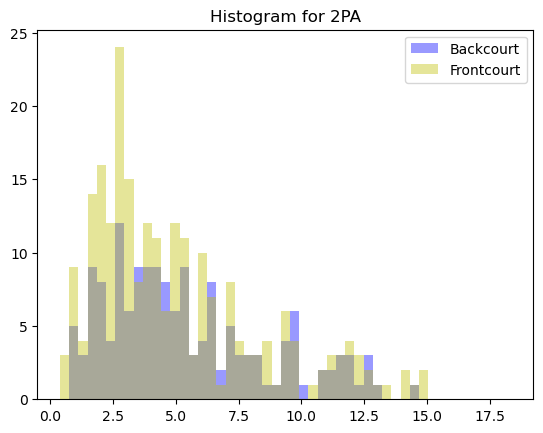

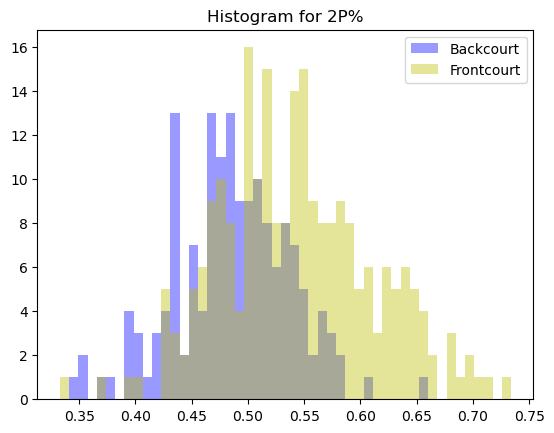

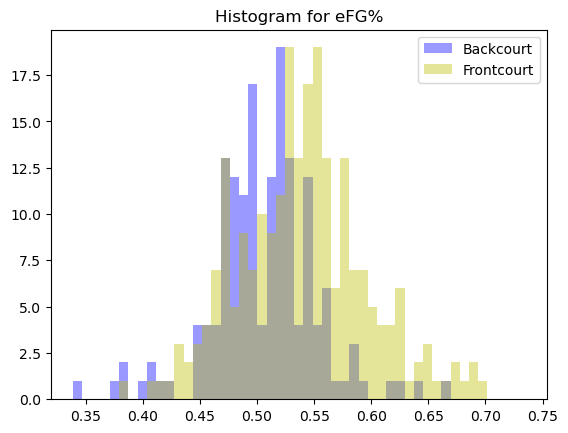

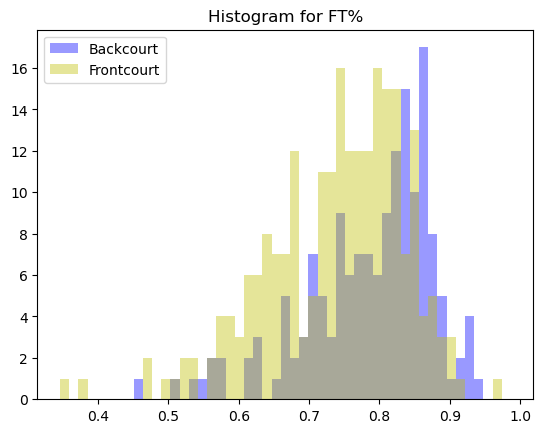

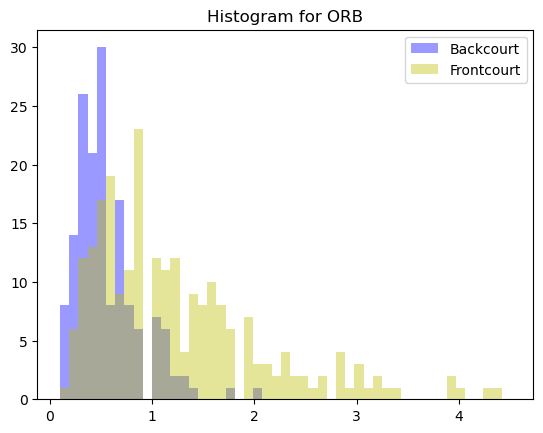

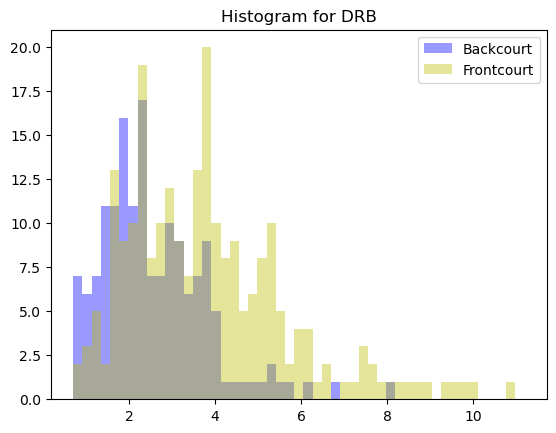

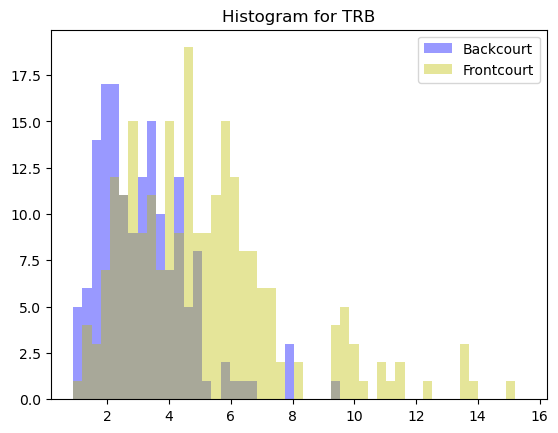

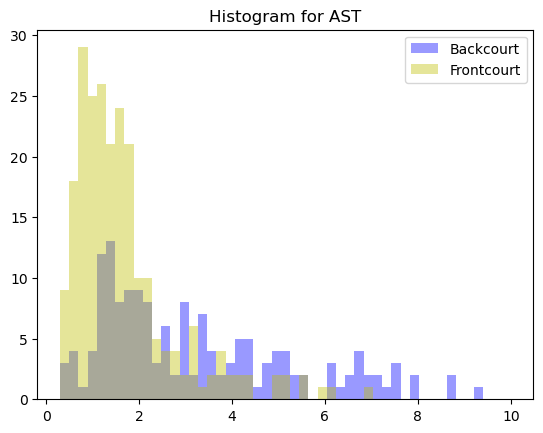

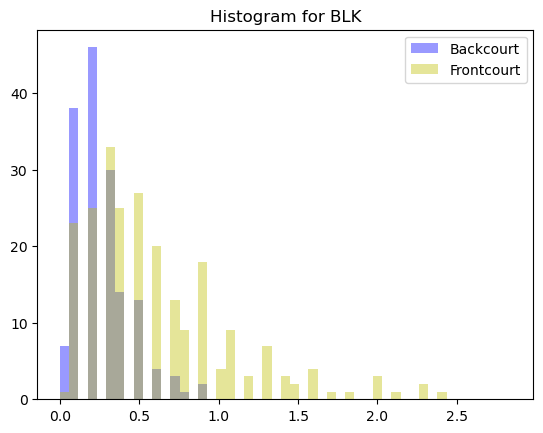

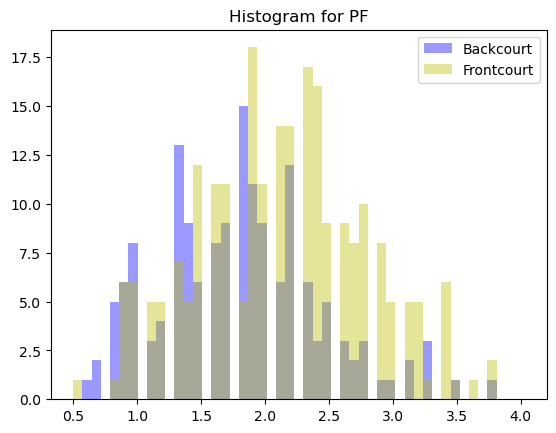

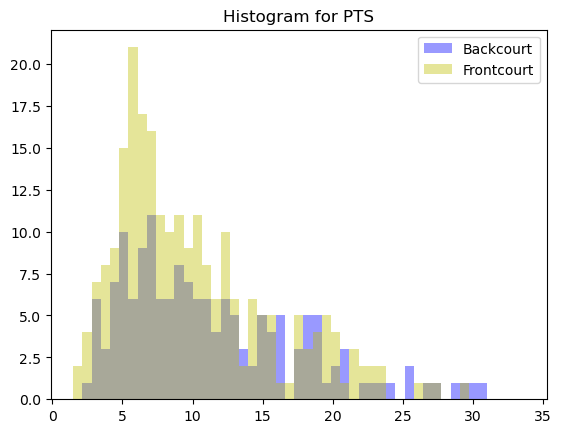

In [15]:
for cat in ['MP','FGA','FG%','3PA','3P%' ,'2PA','2P%','eFG%','FT%','ORB','DRB','TRB','AST','BLK','PF','PTS']:
    backcourt = list(df[df['Pos'] == 0][cat])
    frontcourt = list(df[df['Pos'] == 1][cat])
    xmin = min(min(backcourt),min(frontcourt))
    xmax = max(max(backcourt),max(frontcourt))
    width = (xmax - xmin) / 50
    sns.distplot(backcourt,color = 'b', kde=False,bins=np.arange(xmin,xmax,width))
    sns.distplot(frontcourt,color = 'y', kde=False,bins=np.arange(xmin,xmax,width))
    plt.legend(['Backcourt','Frontcourt'])
    plt.title('Histogram for {}'.format(cat))
    plt.show()

## 3. Select features of importance for predicting Position (Pos) and split the data into three sets such that 60% will be the training data, 20% will be the validation data, and 20% will be the test data.

In [16]:
features_of_importance = ['MP','FG%','3PA','2P%','FT%','ORB','AST','BLK','PF','PTS']
features = df[features_of_importance]
response = df['Pos']

X_train, X_holdout, y_train, y_holdout = train_test_split(features,response,test_size=0.4,random_state=23)
X_validation, X_test, y_validation, y_test = train_test_split(X_holdout,y_holdout,test_size=0.5,random_state=23)

In [17]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

## 4. Logistic regression model with varying regularization parameter values.  Cross-validation is used during the training of the model.  The mean and standard deviation scores for each hyperparameter combination is output with the best model denoted.

In [18]:
lr = LogisticRegression()
lr_parameters = {'C': [0.1,1,5,10,50],
              'penalty': ['l1','l2'],
               'solver': ['liblinear']}
cv_lr = GridSearchCV(lr,lr_parameters,cv=5)
cv_lr.fit(features,response.values.ravel())
print_results(cv_lr)

BEST PARAMS: {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}

0.82 (+/-0.105) for {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.812 (+/-0.132) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.823 (+/-0.084) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.82 (+/-0.1) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.817 (+/-0.097) for {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
0.83 (+/-0.083) for {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}
0.823 (+/-0.1) for {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.823 (+/-0.088) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.817 (+/-0.102) for {'C': 50, 'penalty': 'l1', 'solver': 'liblinear'}
0.817 (+/-0.102) for {'C': 50, 'penalty': 'l2', 'solver': 'liblinear'}


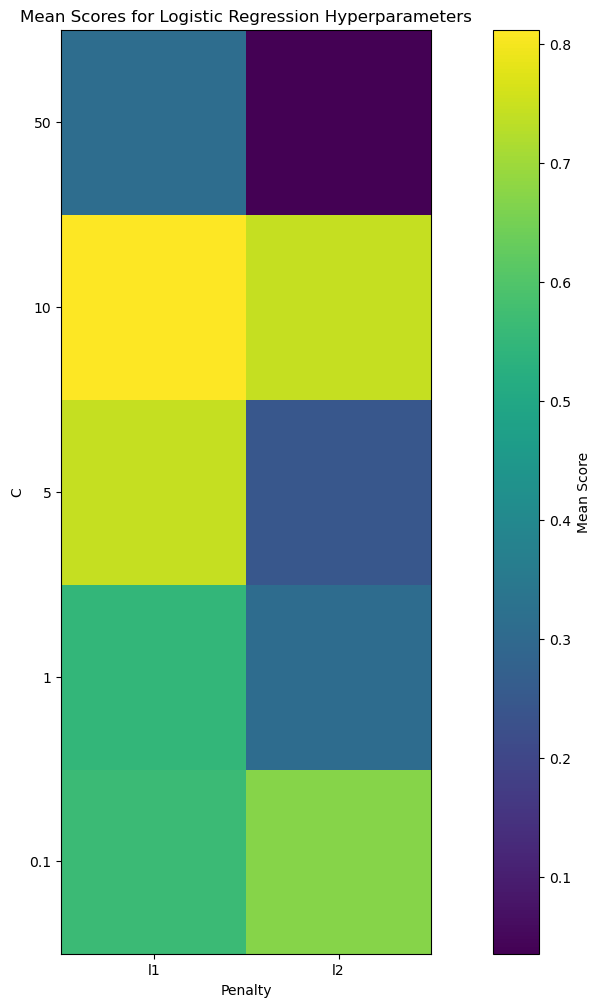

In [19]:
mean_scores = np.random.rand(len(lr_parameters['C']), len(lr_parameters['penalty']))

# Create a heatmap to visualize mean scores
plt.figure(figsize=(16, 12))
plt.imshow(mean_scores, cmap='viridis', origin='lower')
plt.title('Mean Scores for Logistic Regression Hyperparameters')
plt.xlabel('Penalty')
plt.ylabel('C')
plt.xticks(np.arange(len(lr_parameters['penalty'])), lr_parameters['penalty'])
plt.yticks(np.arange(len(lr_parameters['C'])), lr_parameters['C'])
plt.colorbar(label='Mean Score')
plt.show()

## 5. Random forest model with varying hyperparameter values.  Cross-validation is used during the training of the model.  The mean and standard deviation scores for each hyperparameter combination is output with the best model denoted.

In [20]:
rf = RandomForestClassifier()
rf_parameters = {'n_estimators': [5,25,50,250],
                  'max_depth': [2,4,5,20,None]
                }
cv_rf = GridSearchCV(rf,rf_parameters,cv=5)
cv_rf.fit(features,response.values.ravel())
print_results(cv_rf)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 25}

0.736 (+/-0.091) for {'max_depth': 2, 'n_estimators': 5}
0.764 (+/-0.166) for {'max_depth': 2, 'n_estimators': 25}
0.777 (+/-0.145) for {'max_depth': 2, 'n_estimators': 50}
0.787 (+/-0.151) for {'max_depth': 2, 'n_estimators': 250}
0.782 (+/-0.05) for {'max_depth': 4, 'n_estimators': 5}
0.817 (+/-0.101) for {'max_depth': 4, 'n_estimators': 25}
0.802 (+/-0.13) for {'max_depth': 4, 'n_estimators': 50}
0.807 (+/-0.112) for {'max_depth': 4, 'n_estimators': 250}
0.782 (+/-0.045) for {'max_depth': 5, 'n_estimators': 5}
0.805 (+/-0.106) for {'max_depth': 5, 'n_estimators': 25}
0.8 (+/-0.122) for {'max_depth': 5, 'n_estimators': 50}
0.8 (+/-0.12) for {'max_depth': 5, 'n_estimators': 250}
0.736 (+/-0.061) for {'max_depth': 20, 'n_estimators': 5}
0.815 (+/-0.095) for {'max_depth': 20, 'n_estimators': 25}
0.812 (+/-0.1) for {'max_depth': 20, 'n_estimators': 50}
0.795 (+/-0.122) for {'max_depth': 20, 'n_estimators': 250}
0.812 (+/-0.12) for {'max_

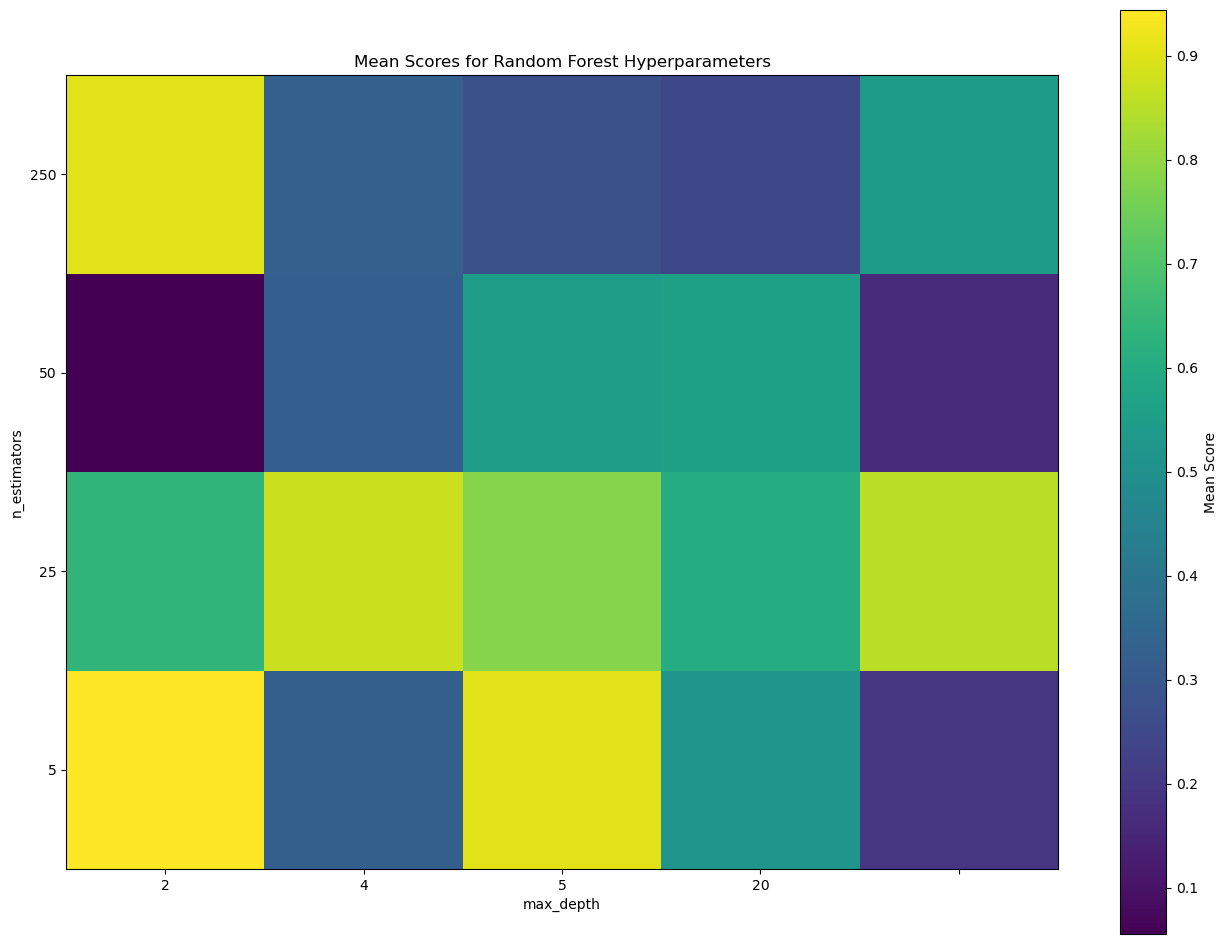

In [21]:
mean_scores = np.random.rand(len(rf_parameters['n_estimators']), len(rf_parameters['max_depth']))

# Create a heatmap to visualize mean scores
plt.figure(figsize=(16, 12))
plt.imshow(mean_scores, cmap='viridis', origin='lower')
plt.title('Mean Scores for Random Forest Hyperparameters')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.xticks(np.arange(len(rf_parameters['max_depth'])), rf_parameters['max_depth'])
plt.yticks(np.arange(len(rf_parameters['n_estimators'])), rf_parameters['n_estimators'])
plt.colorbar(label='Mean Score')
plt.show()

## 6. Gradient boosting classifier model with varying depths, widths, and learning rates.  Cross-validation is used during the training of the model.  The mean and standard deviation scores for each hyperparameter combination is output with the best model denoted. 

In [22]:
gb = GradientBoostingClassifier()
gb_parameters = {'n_estimators': [5,25,125,625],
                 'max_depth': [2,4,8,16],
                 'learning_rate': [0.01,0.1,1,5,10]}

cv_gb = GridSearchCV(gb,gb_parameters,cv=5)
cv_gb.fit(features, response.values.ravel())
print_results(cv_gb)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 625}

0.599 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 5}
0.627 (+/-0.032) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 25}
0.792 (+/-0.128) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 125}
0.805 (+/-0.114) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 625}
0.599 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 5}
0.693 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 25}
0.8 (+/-0.106) for {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 125}
0.822 (+/-0.106) for {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 625}
0.599 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 5}
0.708 (+/-0.145) for {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 25}
0.726 (+/-0.092) for {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 125}
0.731 (+/-0.081) for {'learning_rate'

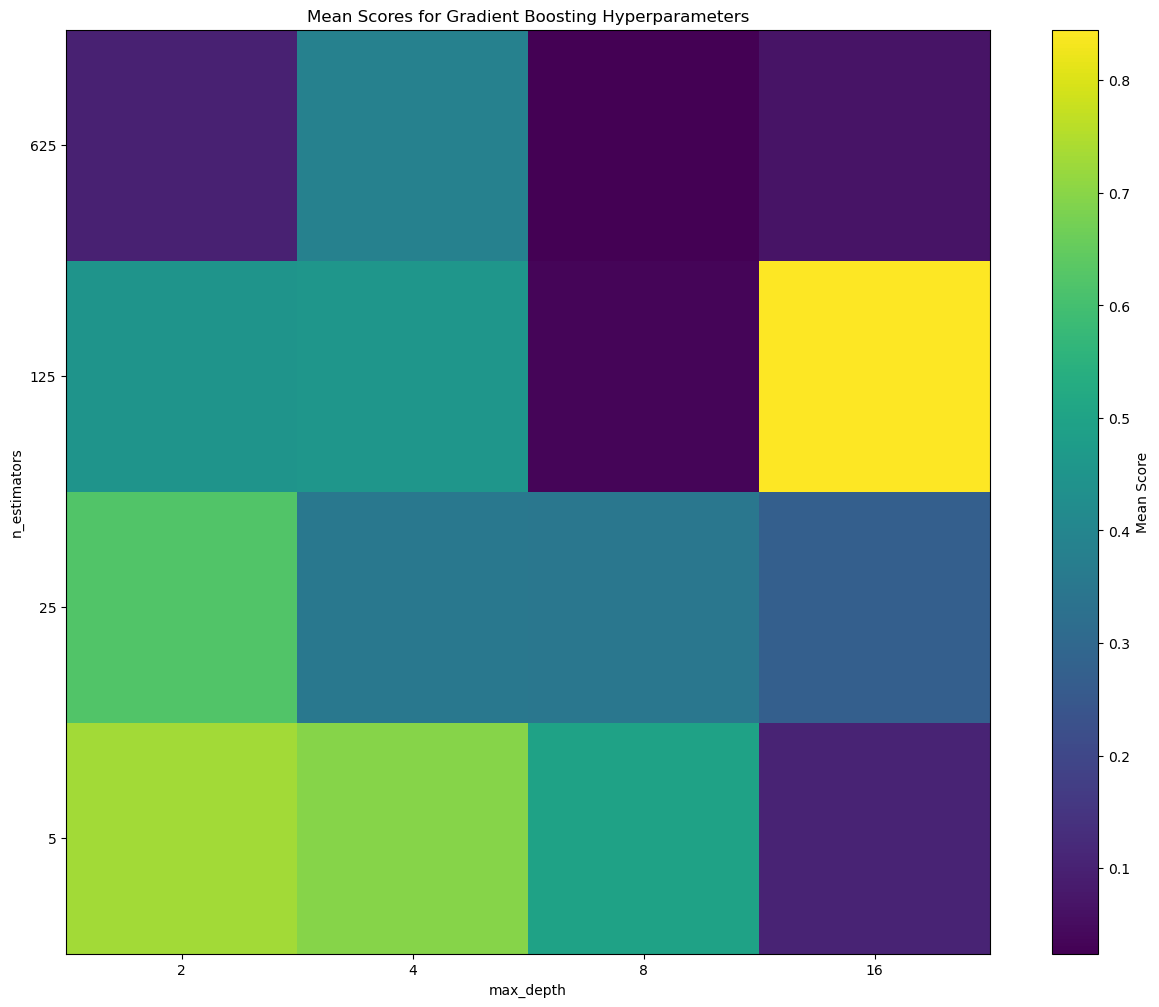

In [23]:
mean_scores = np.random.rand(len(gb_parameters['n_estimators']), len(gb_parameters['max_depth']))

# Create a heatmap to visualize mean scores
plt.figure(figsize=(16, 12))
plt.imshow(mean_scores, cmap='viridis', origin='lower')
plt.title('Mean Scores for Gradient Boosting Hyperparameters')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.xticks(np.arange(len(gb_parameters['max_depth'])), gb_parameters['max_depth'])
plt.yticks(np.arange(len(gb_parameters['n_estimators'])), gb_parameters['n_estimators'])
plt.colorbar(label='Mean Score')
plt.show()

## 7. Evaluate each of the models utilizing the validation set.

In [24]:
models = {'LR':cv_lr.best_estimator_,'RF':cv_rf.best_estimator_,'GB':cv_gb.best_estimator_}

In [25]:
def evaluate_model(name,model,features,response):
    startTime = time()
    pred = model.predict(features)
    endTime = time()
    accuracy = round(accuracy_score(response,pred),3)
    precision = round(precision_score(response,pred),3)
    recall = round(recall_score(response,pred),3)
    print('\t {} \n --------------------- \n Accuracy: {} \n Precision: {} \n Recall: {} \n Latency: {}ms \n'.format(name,accuracy,precision,recall,round((endTime-startTime)*1000,3)))

In [26]:
for name, mdl in models.items():
    evaluate_model(name,mdl,X_validation,y_validation)

	 LR 
 --------------------- 
 Accuracy: 0.81 
 Precision: 0.792 
 Recall: 0.884 
 Latency: 1.004ms 

	 RF 
 --------------------- 
 Accuracy: 0.924 
 Precision: 0.93 
 Recall: 0.93 
 Latency: 2.5ms 

	 GB 
 --------------------- 
 Accuracy: 0.987 
 Precision: 1.0 
 Recall: 0.977 
 Latency: 1.498ms 



## 8. Select the the best performing model from the previous question. Evaluate the model utilizing the test set.

In [27]:
evaluate_model('GB',models['GB'],X_test,y_test)

	 GB 
 --------------------- 
 Accuracy: 0.962 
 Precision: 0.957 
 Recall: 0.978 
 Latency: 1.501ms 



[Text(0.5, 1.0, 'Confusion Matrix')]

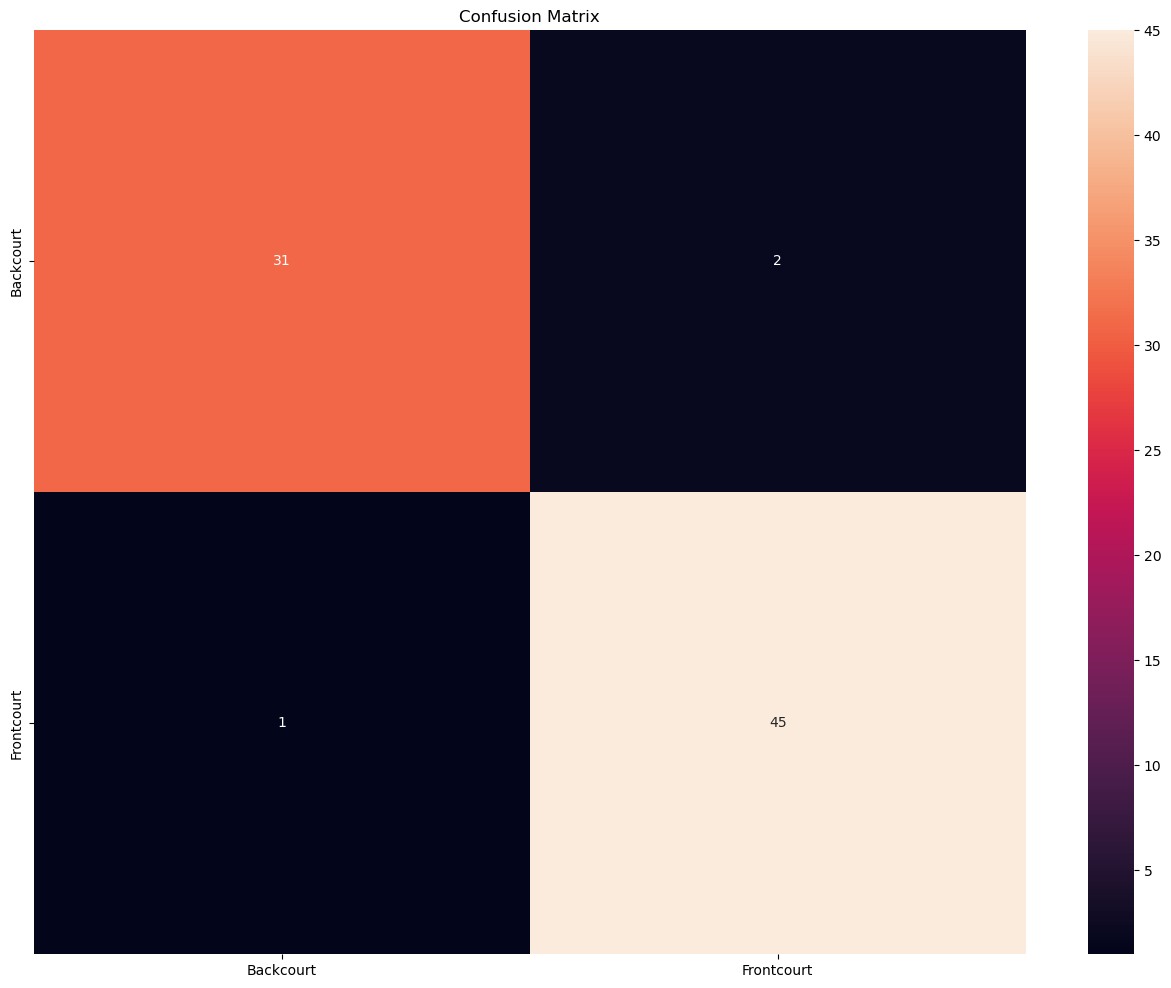

In [28]:
cf = confusion_matrix(y_test, cv_gb.predict(X_test))
plt.figure(figsize=(16, 12))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=["Backcourt","Frontcourt"], 
                 yticklabels=["Backcourt","Frontcourt"])
ax.set(title="Confusion Matrix")